In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model

from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./train.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
def score(y_true,y_pred):
    print (precision_score(y_true,y_pred,average="micro"))
    print (recall_score(y_true,y_pred,average="micro"))
    print (accuracy_score(y_true,y_pred))
    print (f1_score(y_true,y_pred,average="micro"))

In [5]:
labels = df.pop("label")

In [6]:
ohe = OneHotEncoder()
ohe.fit(labels.reshape(-1,1))

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [7]:
X,x,Y,y = train_test_split(df.values,labels)

In [8]:
Y = ohe.transform(Y.reshape(-1,1))

In [9]:
model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(784,)))
model.add(Dense(128,activation="relu"))
model.add(Dense(1024,activation="relu"))
model.add(BatchNormalization(momentum=0.9))
model.add(Dense(10,activation="softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [11]:
model.fit(X,Y,epochs=10,)

Train on 31500 samples
Epoch 1/10
31500/31500 [==============================] - 3s 96us/sample - loss: 0.3811 - acc: 0.8849
Epoch 2/10
31500/31500 [==============================] - 3s 81us/sample - loss: 0.2030 - acc: 0.9385
Epoch 3/10
31500/31500 [==============================] - 3s 82us/sample - loss: 0.1548 - acc: 0.9528
Epoch 4/10
31500/31500 [==============================] - 3s 81us/sample - loss: 0.1363 - acc: 0.9577
Epoch 5/10
31500/31500 [==============================] - 3s 83us/sample - loss: 0.1255 - acc: 0.9615
Epoch 6/10
31500/31500 [==============================] - 3s 81us/sample - loss: 0.0962 - acc: 0.9705
Epoch 7/10
31500/31500 [==============================] - 3s 83us/sample - loss: 0.0912 - acc: 0.9713
Epoch 8/10
31500/31500 [==============================] - 3s 81us/sample - loss: 0.0857 - acc: 0.9725
Epoch 9/10
31500/31500 [==============================] - 3s 83us/sample - loss: 0.0696 - acc: 0.9778
Epoch 10/10
31500/31500 [==============================] - 

In [12]:
y_pred = model.predict_classes(x)
# score(y,y_pred)

In [13]:
score(y.values,y_pred)

0.9578095238095238
0.9578095238095238
0.9578095238095238
0.9578095238095238


In [14]:
X,x = X/255,x/255

In [15]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
model.fit(X,Y,epochs=10)

Train on 31500 samples
Epoch 1/10
31500/31500 [==============================] - 3s 89us/sample - loss: 0.0672 - acc: 0.9782
Epoch 2/10
31500/31500 [==============================] - 3s 82us/sample - loss: 0.0525 - acc: 0.9836
Epoch 3/10
31500/31500 [==============================] - 3s 81us/sample - loss: 0.0495 - acc: 0.9840
Epoch 4/10
31500/31500 [==============================] - 3s 82us/sample - loss: 0.0464 - acc: 0.9843
Epoch 5/10
31500/31500 [==============================] - 3s 82us/sample - loss: 0.0398 - acc: 0.9869
Epoch 6/10
31500/31500 [==============================] - 3s 82us/sample - loss: 0.0354 - acc: 0.9890
Epoch 7/10
31500/31500 [==============================] - 3s 81us/sample - loss: 0.0443 - acc: 0.9857
Epoch 8/10
31500/31500 [==============================] - 3s 95us/sample - loss: 0.0312 - acc: 0.9894
Epoch 9/10
31500/31500 [==============================] - 3s 80us/sample - loss: 0.0296 - acc: 0.9900
Epoch 10/10
31500/31500 [==============================] - 

### CNN

In [16]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=4,input_shape=(28,28,1),activation="relu"))
model.add(Conv2D(32,3,activation="relu"))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Conv2D(32,3,activation="relu"))
model.add(Conv2D(64,2,activation="relu"))
model.add(Conv2D(64,3,activation="relu"))
model.add(MaxPool2D(pool_size=1))
model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [17]:
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(X.reshape(-1,28,28,1),Y,epochs=10)

Train on 31500 samples
Epoch 1/10
31500/31500 [==============================] - 5s 161us/sample - loss: 0.2071 - acc: 0.9341
Epoch 2/10
31500/31500 [==============================] - 4s 126us/sample - loss: 0.0685 - acc: 0.9792
Epoch 3/10
31500/31500 [==============================] - 4s 123us/sample - loss: 0.0504 - acc: 0.9840
Epoch 4/10
31500/31500 [==============================] - 4s 121us/sample - loss: 0.0425 - acc: 0.9877
Epoch 5/10
31500/31500 [==============================] - 4s 125us/sample - loss: 0.0354 - acc: 0.9893
Epoch 6/10
31500/31500 [==============================] - 4s 122us/sample - loss: 0.0331 - acc: 0.9901
Epoch 7/10
31500/31500 [==============================] - 4s 127us/sample - loss: 0.0267 - acc: 0.9916
Epoch 8/10
31500/31500 [==============================] - 4s 128us/sample - loss: 0.0236 - acc: 0.9923
Epoch 9/10
31500/31500 [==============================] - 4s 138us/sample - loss: 0.0196 - acc: 0.9940
Epoch 10/10
31500/31500 [=========================

In [19]:
model.evaluate(x.reshape(-1,28,28,1),ohe.transform(y.reshape(-1,1)))

10500/10500 [==============================] - 1s 79us/sample - loss: 0.0499 - acc: 0.9872


[0.049870944982131946, 0.9872381]

In [20]:
df = pd.read_csv("./train.csv")
labels = df.pop('label')
images = df.values

In [21]:
def crop(img,size=28):
    
    H_MIN,H_MAX = np.where(img.std(axis=1)>8)[0][[0,-1]]
    W_MIN,W_MAX = np.where(img.std(axis=0)>8)[0][[0,-1]]
    
    img = img[H_MIN:H_MAX,W_MIN:W_MAX]
    img = np.pad(img,pad_width=2)
    
    return cv2.resize(img.astype(np.uint8),(size,size))

def input_gen(images,labels,epochs=10,_crop=True):
    for epoch in range(epochs):
        for i in range(images.shape[0]):
            y = ohe.transform([[labels[i]]])
            img_full = crop(images[i].reshape(28,28))
            img_half_0 = img_full[:,:14]
            img_half_1 = img_full[:,14:]
            yield (
                {
                    "input_full":img_full.reshape(1,28,28,1)/255,
                    "input_half_0":img_half_0.reshape(1,28,14,1)/255,
                    "input_half_1":img_half_1.reshape(1,28,14,1)/255,
                },
                {"output":y.toarray()}
            )
            
i = input_gen(images,labels)
a = next(i)[0]

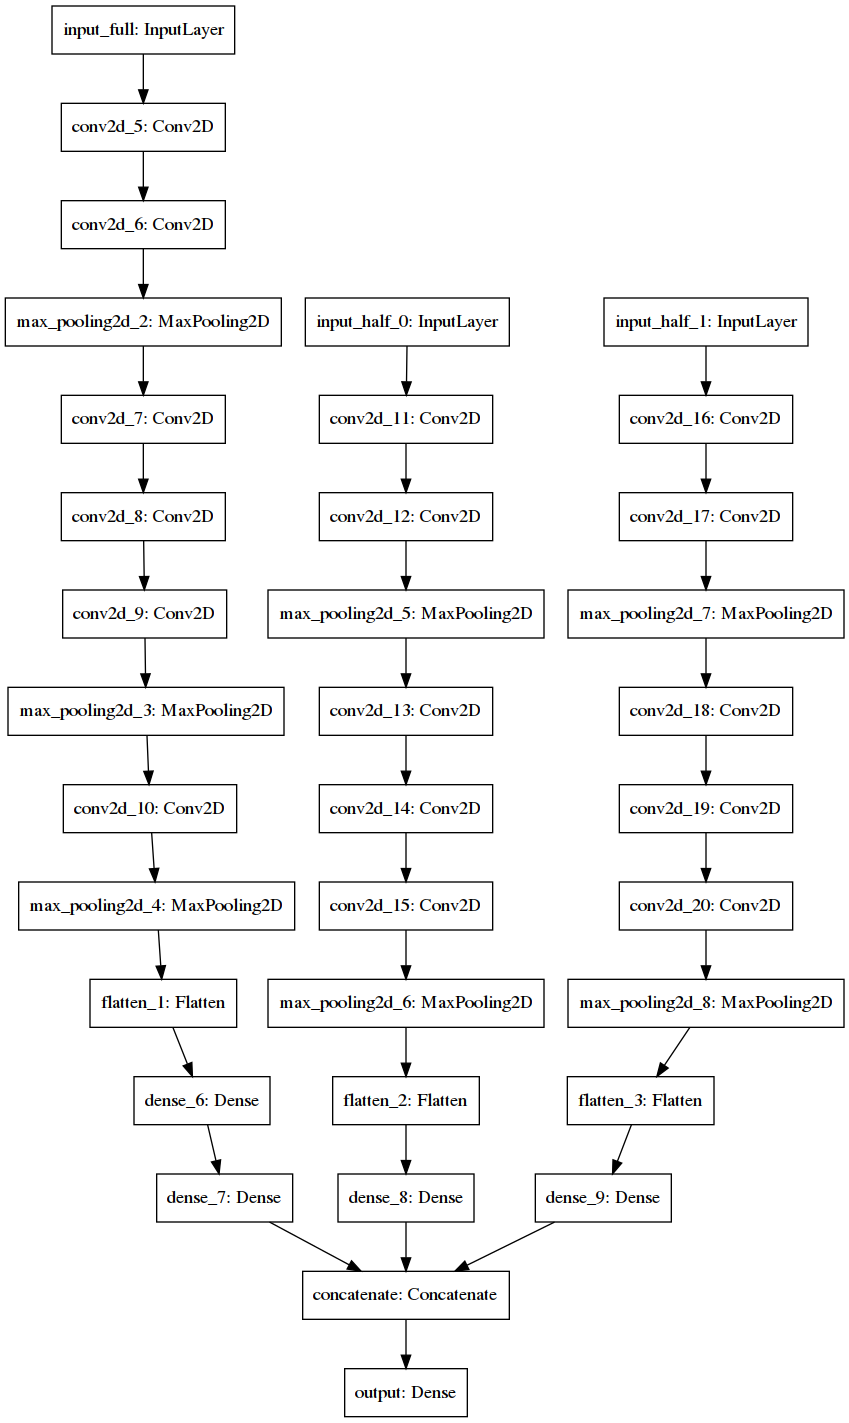

In [22]:
inputs = Input(shape=(28,28,1),name="input_full")

model = Conv2D(filters=32,kernel_size=4,input_shape=(28,28,1),activation="relu")(inputs)

model = Conv2D(32,4,activation="relu")(model)
model = MaxPool2D(pool_size=(2))(model)
model = Conv2D(32,3,activation="relu")(model)
model = Conv2D(64,2,activation="relu")(model)
model = Conv2D(64,3,activation="relu")(model)
model = MaxPool2D(pool_size=1)(model)
model = Conv2D(64,2,activation="relu")(model)
model = MaxPool2D(pool_size=1)(model)
model = Flatten()(model)
model = Dense(1024,activation="relu")(model)
model = Dense(1024,activation="relu")(model)

inputs_half_0 = Input(shape=(28,14,1),name='input_half_0')
model_half_0 = Conv2D(filters=32,kernel_size=4,input_shape=(28,14,1),activation="relu")(inputs_half_0)
model_half_0 = Conv2D(32,4,activation="relu")(model_half_0)
model_half_0 = MaxPool2D(pool_size=(2))(model_half_0)
model_half_0 = Conv2D(32,2,activation="relu")(model_half_0)
model_half_0 = Conv2D(64,2,activation="relu")(model_half_0)
model_half_0 = Conv2D(64,2,activation="relu")(model_half_0)
model_half_0 = MaxPool2D(pool_size=1)(model_half_0)
model_half_0 = Flatten()(model_half_0)
model_half_0 = Dense(512,activation="relu")(model_half_0)

inputs_half_1 = Input(shape=(28,14,1),name='input_half_1')
model_half_1 = Conv2D(filters=32,kernel_size=4,input_shape=(28,14,1),activation="relu")(inputs_half_1)
model_half_1 = Conv2D(32,4,activation="relu")(model_half_1)
model_half_1 = MaxPool2D(pool_size=(2))(model_half_1)
model_half_1 = Conv2D(32,2,activation="relu")(model_half_1)
model_half_1 = Conv2D(64,2,activation="relu")(model_half_1)
model_half_1 = Conv2D(64,2,activation="relu")(model_half_1)
model_half_1 = MaxPool2D(pool_size=1)(model_half_1)
model_half_1 = Flatten()(model_half_1)
model_half_1 = Dense(512,activation="relu")(model_half_1)

merge = concatenate([model,model_half_0,model_half_1])

model = Dense(10,activation="softmax",name="output")(merge)
model = Model(inputs=[inputs,inputs_half_0,inputs_half_1],outputs=[model])

from tensorflow.keras.utils import plot_model
plot_model(model)

In [23]:
X,x,Y,y = train_test_split(images,labels.values)

In [24]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [26]:
EPOCHS = 15
model.fit_generator(input_gen(X,Y,epochs=EPOCHS),steps_per_epoch=X.shape[0],epochs=EPOCHS);

Epoch 1/15
  628/31500 [..............................] - ETA: 3:39 - loss: 0.3552 - acc: 0.8869

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-a3b696de914a>", line 2, in <module>
    model.fit_generator(input_gen(X,Y,epochs=EPOCHS),steps_per_epoch=X.shape[0],epochs=EPOCHS);
  File "/usr/lib/python3/dist-packages/tensorflow_core/python/keras/engine/training.py", line 1296, in fit_generator
    steps_name='steps_per_epoch')
  File "/usr/lib/python3/dist-packages/tensorflow_core/python/keras/engine/training_generator.py", line 265, in model_iteration
    batch_outs = batch_function(*batch_data)
  File "/usr/lib/python3/dist-packages/tensorflow_core/python/keras/engine/training.py", line 1017, in train_on_batch
    outputs = self.train_function(ins)  # pylint: disable=not-callable
  File "/usr/lib/python3/dist-packages/tensorflow_core/python/keras/backend.py", line 3476, in __call__
    run_metadata=self.run_metad

KeyboardInterrupt: 

In [ ]:
model.evaluate_generator(input_gen(x,y,epochs=1),steps=x.shape[0])